In [3]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np 
import glob
import os

In [4]:
#To analyze all the data at once, I created a dataframe for all the CSV files.
#Pro: Allows for analysis of all three million tweets at once
#Con: Large dataset might hinder the speed of analysis due to comp limitations. 
path = 'data'
filenames = glob.glob(path + '/*csv')
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

IRA2016 = pd.concat(dfs, ignore_index= True)


/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_62449/3619280708.py:8: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_62449/3619280708.py:8: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))
/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_62449/3619280708.py:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(filename))


In [5]:
#Potential Analysis:
#Hashtag trend analysis to identify themes and propaganda target audiences.
#Top Propaganda Agent
#Bot classification for Top 20
#Effectiveness Rating 
IRA2016.T

,0,1,2,3,4,5,6,7,8,9,...,2946197,2946198,2946199,2946200,2946201,2946202,2946203,2946204,2946205,2946206
external_author_id,2495567768,2495567768,2495567768,2495567768,2495567768,2495567768,2495567768,2495567768,2495567768,2495567768,...,2260338140,2260338140,2260338140,2260338140,2260338140,2260338140,2260338140,2260338140,2260338140,2260338140
author,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,DAILYSANFRAN,...,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY,POLITICS_T0DAY
content,Police: Airline pilot found passed out in cock...,Dashcam video shows man launching himself onto...,Man Arrested For Setting Fire To South SF Medi...,Practical tips to achieving your New Year's re...,Couple disappears during trip to Big Sur https...,Vacaville Police Arrest Man Suspected Of Welfa...,VIDEO: Female Lyft driver violently attacked o...,Sex offender arrested for allegedly exposing h...,#7Things to know before you go from ABC7 News:...,49ers CEO Jed York: ‘I want to apologize’ http...,...,https://t.co/4XSJSNpUex,"Россия, Саудовская Аравия, Катар и Венесуэла з...",Украина и Россия договорились о взаимном возвр...,Авиация США летит к российским границам с учеб...,https://t.co/c4qNrR2a4U,Порошенко призвал к полной перезагрузке правит...,Турецкая атомная бомба появится в 2023 году. ...,История одной татуировки. Тату на предплечье:...,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",На популярном видеохостинге YouTube опубликова...
region,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
language,English,English,English,English,English,English,English,English,English,English,...,Russian,Russian,Russian,Russian,Russian,Russian,Russian,Russian,Russian,Russian
publish_date,1/2/2017 14:39,1/2/2017 15:39,1/2/2017 16:19,1/2/2017 16:29,1/2/2017 16:39,1/2/2017 17:19,1/2/2017 17:29,1/2/2017 17:39,1/2/2017 18:29,1/2/2017 18:39,...,2/16/2016 21:50,2/16/2016 21:55,2/16/2016 22:05,2/16/2016 22:10,2/16/2016 22:15,2/16/2016 22:20,2/16/2016 22:25,2/16/2016 22:31,2/16/2016 22:35,2/16/2016 22:40
harvested_date,1/2/2017 14:39,1/2/2017 15:39,1/2/2017 16:19,1/2/2017 16:29,1/2/2017 16:39,1/2/2017 17:19,1/2/2017 17:29,1/2/2017 17:39,1/2/2017 18:29,1/2/2017 18:39,...,2/16/2016 21:50,2/16/2016 21:55,2/16/2016 22:05,2/16/2016 22:10,2/16/2016 22:15,2/16/2016 22:20,2/16/2016 22:25,2/16/2016 22:31,2/16/2016 22:35,2/16/2016 22:40
following,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,...,92,92,92,92,92,92,92,92,92,92
followers,16782,16782,16782,16782,16781,16781,16782,16782,16782,16782,...,887,887,887,887,887,887,887,887,887,887
updates,34960,34961,34962,34963,34964,34965,34966,34967,34968,34969,...,12929,12930,12931,12932,12933,12934,12935,12936,12937,12938


In [6]:
Propaganda_Agents = IRA2016['author'].unique()
len(Propaganda_Agents)
# 2843 unique propaganda agents

2843

In [7]:
follower_counts = IRA2016['followers'].value_counts()
follower_counts.head(30)
followers_by_author = IRA2016.groupby('author')['followers'].max()
followers_by_author_sorted = followers_by_author.sort_values(ascending=False)
Top_10_By_Followers = followers_by_author_sorted.head(10)
Top_30_By_Followers = followers_by_author_sorted.head(30)

In [8]:
Top_10_By_Followers

author
NOVOSTIMSK        251276
TEN_GOP           145244
NOVOSTISPB        113638
KADIROVRUSSIA     110155
MAXDEMENTIEV      103197
LAVROVMUESLI       72720
JENN_ABRAMS        71022
PAMELA_MOORE13     70734
TODAYNYCITY        62088
ELEVEN_GOP         59100
Name: followers, dtype: int64

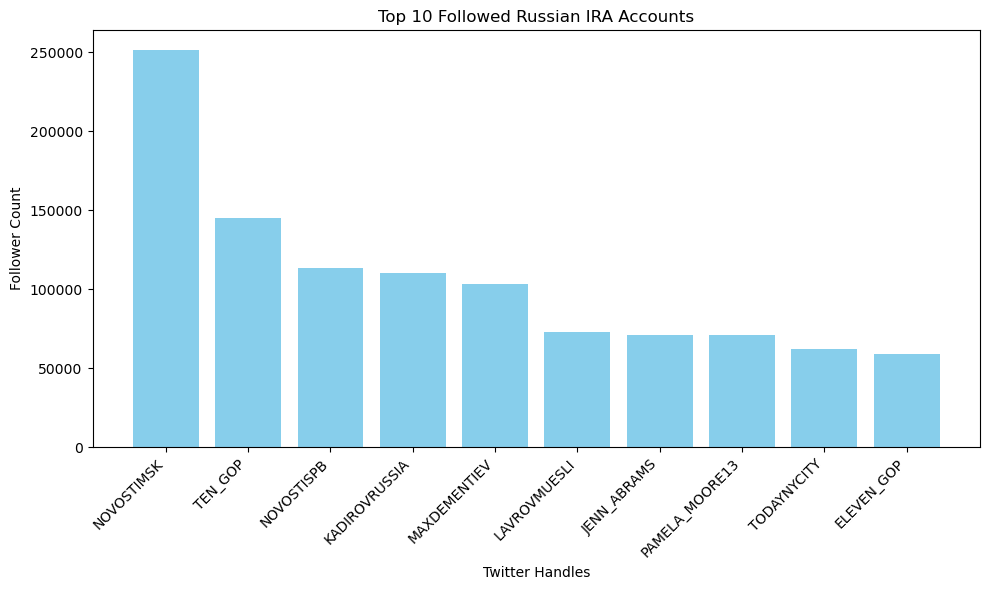

In [9]:
twitter_handles = ['NOVOSTIMSK', 'TEN_GOP', 'NOVOSTISPB', 'KADIROVRUSSIA', 'MAXDEMENTIEV',
                   'LAVROVMUESLI', 'JENN_ABRAMS', 'PAMELA_MOORE13', 'TODAYNYCITY', 'ELEVEN_GOP']
follower_counts = [251276, 145244, 113638, 110155, 103197, 72720, 71022, 70734, 62088, 59100]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(twitter_handles, follower_counts, color='skyblue')
plt.xlabel('Twitter Handles')
plt.ylabel('Follower Count')
plt.title('Top 10 Followed Russian IRA Accounts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
tweet_counts = IRA2016['author'].value_counts()

# Get the user with the most tweets
most_tweets_user = tweet_counts.idxmax()
num_tweets = tweet_counts.max()

most_tweets_user
#num_tweets
top10_agents = tweet_counts.head(10)
top10_agents

top30_agents = tweet_counts.head(30)
print(top30_agents)

author
EXQUOTE            59174
SCREAMYMONKEY      44001
AMELIEBALDWIN      35261
WORLDNEWSPOLI      35155
TODAYPITTSBURGH    33602
SPECIALAFFAIR      32556
SEATTLE_POST       30793
FINDDIET           29038
KANSASDAILYNEWS    28806
ROOMOFRUMOR        28351
DAILYSANFRAN       27996
WORLDOFHASHTAGS    23724
COVFEFENATIONUS    23544
JENN_ABRAMS        22849
CHICAGODAILYNEW    22148
RIAFANRU           21461
POLITICS_T0DAY     21444
FUNDDIET           19992
BERLINBOTE         19658
CHESPLAYSCHESS     19216
TODAYNYCITY        18498
ONLINECLEVELAND    17666
HYDDROX            17384
OLD_NEW_POLICY     15418
TODAYINSYRIA       15401
NEWORLEANSON       14861
ARM_2_ALAN         14721
CHRIXMORGAN        14705
DAILYSANDIEGO      14381
DAILYLOSANGELES    14122
Name: count, dtype: int64


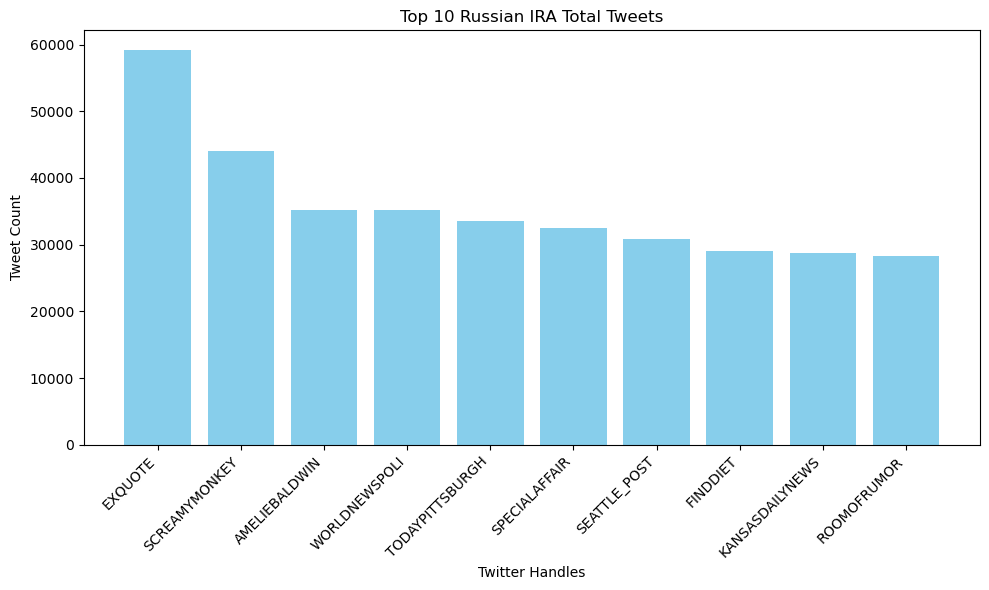

In [11]:
# Usernames and follower counts
users = ['EXQUOTE', 'SCREAMYMONKEY', 'AMELIEBALDWIN', 'WORLDNEWSPOLI', 'TODAYPITTSBURGH',
         'SPECIALAFFAIR', 'SEATTLE_POST', 'FINDDIET', 'KANSASDAILYNEWS', 'ROOMOFRUMOR']
tweet_counts_counts = [59174, 44001, 35261, 35155, 33602, 32556, 30793, 29038, 28806, 28351]

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.bar(users, tweet_counts_counts, color='skyblue')
plt.xlabel('Twitter Handles')
plt.ylabel('Tweet Count')
plt.title('Top 10 Russian IRA Total Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# List of usernames to keep
users_to_keep = ['EXQUOTE', 'SCREAMYMONKEY', 'AMELIEBALDWIN', 'WORLDNEWSPOLI', 'TODAYPITTSBURGH',
                 'SPECIALAFFAIR', 'SEATTLE_POST', 'FINDDIET', 'KANSASDAILYNEWS', 'ROOMOFRUMOR']

# Filter the DataFrame to keep only the rows where the username is in the list of users to keep
Top_10_Agents = IRA2016[IRA2016['author'].isin(users_to_keep)]

Top_10_Agents.T

,265928,265929,265930,265931,265932,265933,265934,265935,265936,265937,...,2469699,2469700,2469701,2469702,2469703,2469704,2469705,2469706,2469707,2469708
external_author_id,1964340318,1964340318,3272640600,1964340318,1964340318,1964340318,1964340318,3272640600,1964340318,3272640600,...,2611151319,2611151319,2611151319,2611151319,2611151319,2611151319,2611151319,2611151319,2611151319,2611151319
author,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,EXQUOTE,...,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST,SEATTLE_POST
content,"http://t.co/WMm6Bl5gtO "" I wish i got paid to ...",http://t.co/pJhd2oi8Sx Quick mile run and an a...,http://t.co/ER6wcHAWLP Exercise our right! NoB...,http://t.co/oIL8IBRRTr Workout RIP to my legs ...,http://t.co/GV9EA9WoXZ I just finished morning...,http://t.co/ILobqIvCQJ Lose weight cookies @my...,http://t.co/cCJqLq3T9v Yes post workout lunch ...,http://t.co/55yuxoSCkQ Nice! Have a good worko...,http://t.co/7oWgHTlhF6 Yup already took my pre...,http://t.co/CIXluERdiL Good workout my legs ar...,...,Suspects try to flush drugs in Aurora heroin b...,Ballot drop boxes surge in popularity among vo...,‘Obamacare’ holding its own: 6.4M signed up so...,Hotel trade groups sue over Seattle initiative...,"Payday lender Moneytree hit with $500,000 in f...",Report: Facebook’s unmanned aircraft crashed i...,Mom’s great catch at Redmond skating rink http...,Inside the DEA: A chemist’s quest to identify ...,Seahawks opponent outlook: St. Louis Rams #sp...,What to do if the power goes out #local
region,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
language,English,English,English,English,English,English,English,English,English,English,...,English,English,English,English,English,English,English,English,English,English
publish_date,7/10/2015 0:00,7/10/2015 0:01,7/10/2015 0:01,7/10/2015 0:02,7/10/2015 0:03,7/10/2015 0:03,7/10/2015 0:04,7/10/2015 0:04,7/10/2015 0:05,7/10/2015 0:06,...,12/21/2016 1:15,12/21/2016 20:23,12/21/2016 21:23,12/21/2016 22:23,12/21/2016 23:23,12/21/2016 2:11,12/21/2016 4:23,12/21/2016 9:23,12/22/2015 0:11,12/22/2015 0:30
harvested_date,7/10/2015 0:00,7/10/2015 0:01,7/10/2015 0:01,7/10/2015 0:02,7/10/2015 0:03,7/10/2015 0:03,7/10/2015 0:04,7/10/2015 0:05,7/10/2015 0:05,7/10/2015 0:06,...,12/21/2016 1:15,12/21/2016 20:23,12/21/2016 21:23,12/21/2016 22:23,12/21/2016 23:23,12/21/2016 2:11,12/21/2016 4:24,12/21/2016 9:23,12/22/2015 0:11,12/22/2015 0:30
following,2,2,2,2,2,2,2,2,2,2,...,5073,5074,5074,5074,5074,5074,5074,5073,4888,4888
followers,37,36,36,36,36,36,36,36,36,37,...,17091,17093,17095,17094,17094,17091,17091,17092,12649,12649
updates,1363,1365,1364,1366,1367,1368,1369,1370,1371,1373,...,26587,26600,26601,26602,26603,26588,26589,26590,15443,15444


In [13]:
users_to_keep = ['EXQUOTE', 'SCREAMYMONKEY', 'AMELIEBALDWIN', 'WORLDNEWSPOLI', 'TODAYPITTSBURGH',
    'SPECIALAFFAIR', 'SEATTLE_POST', 'FINDDIET', 'KANSASDAILYNEWS', 'ROOMOFRUMOR',
    'DAILYSANFRAN', 'WORLDOFHASHTAGS', 'COVFEFENATIONUS', 'JENN_ABRAMS', 'CHICAGODAILYNEW',
    'RIAFANRU', 'POLITICS_T0DAY', 'FUNDDIET', 'BERLINBOTE', 'CHESPLAYSCHESS',
    'TODAYNYCITY', 'ONLINECLEVELAND', 'HYDDROX', 'OLD_NEW_POLICY', 'TODAYINSYRIA',
    'NEWORLEANSON', 'ARM_2_ALAN', 'CHRIXMORGAN', 'DAILYSANDIEGO', 'DAILYLOSANGELES']
Top_30_Agents = IRA2016[IRA2016['author'].isin(users_to_keep)]

In [14]:
import re

Top_10_Agents['content'] = Top_10_Agents['content'].astype(str)
# Extract hashtags from each tweet in the DataFrame
hashtags_list = Top_10_Agents['content'].apply(lambda x: re.findall(r'#(\w+)', x))

# Flatten the list of lists into a single list of hashtags
hashtags = [tag for sublist in hashtags_list for tag in sublist]

# Remove duplicate hashtags
#unique_hashtags = list(set(hashtags))

#Count the hashtags
hashtags_counts = pd.Series(hashtags).value_counts()

# Get the most used hashtag
most_used_hashtag = hashtags_counts.idxmax()
most_used_hashtag_count = hashtags_counts.max()

#print("Unique hashtags used in the dataset:", unique_hashtags)

hashtags_counts.head(20)

/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_62449/2936272204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_10_Agents['content'] = Top_10_Agents['content'].astype(str)


news             84484
world            27050
sports           20955
TopNews          14626
local            11426
politics          8545
tech              7313
entertainment     6510
TopVideo          6242
environment       5661
life              3693
News              1808
MAGA              1337
US                1308
health            1233
WorldNews         1152
science           1013
tcot               464
WorldVideo         452
Trump              415
Name: count, dtype: int64

In [15]:
import re

Top_30_Agents['content'] = Top_30_Agents['content'].astype(str)
# Extract hashtags from each tweet in the DataFrame
hashtags_list = Top_30_Agents['content'].apply(lambda x: re.findall(r'#(\w+)', x))

# Flatten the list of lists into a single list of hashtags
hashtags = [tag for sublist in hashtags_list for tag in sublist]

# Remove duplicate hashtags
#unique_hashtags = list(set(hashtags))

#Count the hashtags
hashtags_counts = pd.Series(hashtags).value_counts()

# Get the most used hashtag
most_used_hashtag = hashtags_counts.idxmax()
most_used_hashtag_count = hashtags_counts.max()

#print("Unique hashtags used in the dataset:", unique_hashtags)

hashtags_counts.head(20)

/var/folders/tk/9v7wblh54ln9hydhwjhpftpm0000gn/T/ipykernel_62449/4109860954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_30_Agents['content'] = Top_30_Agents['content'].astype(str)


news             102705
world             27288
sports            23514
politics          16890
TopNews           14837
local             14765
tech               7467
entertainment      6642
TopVideo           6338
environment        5703
FAKENEWS           4302
новости            3848
life               3775
MAGA               3496
ISIS               3031
Cleveland          2911
business           2779
РФ                 2585
SanDiego           2273
crime              2261
Name: count, dtype: int64

In [16]:
import re

Most_tweets_agent['content'] = Most_tweets_agent['content'].astype(str)
# Extract hashtags from each tweet in the DataFrame
hashtags_list = Most_tweets_agent['content'].apply(lambda x: re.findall(r'#(\w+)', x))

# Flatten the list of lists into a single list of hashtags
hashtags = [tag for sublist in hashtags_list for tag in sublist]

# Remove duplicate hashtags
#unique_hashtags = list(set(hashtags))

#Count the hashtags
hashtags_counts = pd.Series(hashtags).value_counts()

# Get the most used hashtag
most_used_hashtag = hashtags_counts.idxmax()
most_used_hashtag_count = hashtags_counts.max()

print("Unique hashtags used in the dataset:", unique_hashtags)

NameError: name 'Most_tweets_agent' is not defined

In [ ]:
most_used_hashtag
most_used_hashtag_count

40

In [ ]:
hashtags_counts.head(20)
#PJNET? Open source research indicated PJNET(Patriot Journalism Network) is involved in the use of twitter bots to propagate christian themed messaging.
#Initial inspection of PJNET's website point to a creator named American proffesor named Leonard Witt
#The network allow ordinary individuals to give over access to their twitter accounts for messaging 
#Potential IRA backstop unwhitting organization used to obtain seasoned twitter accounts to propagate propaganda
#Or leverage by IRA to help amplify narratives
#More research is needed to varify

'''news                128757
sports               48654
politics             39748
world                27561
local                25890
TopNews              15149
MAGA                 14808
BlackLivesMatter     12005
tcot                 11492
health               11492
business             10851
PJNET                10463
новости              10325
tech                  8232
entertainment         7586
top                   7417
Cleveland             6710
TopVideo              6547
crime                 6505
ISIS                  6219'''

'news                128757\nsports               48654\npolitics             39748\nworld                27561\nlocal                25890\nTopNews              15149\nMAGA                 14808\nBlackLivesMatter     12005\ntcot                 11492\nhealth               11492\nbusiness             10851\nPJNET                10463\nновости              10325\ntech                  8232\nentertainment         7586\ntop                   7417\nCleveland             6710\nTopVideo              6547\ncrime                 6505\nISIS                  6219'

In [ ]:
import re

IRA2016['content'] = IRA2016['content'].astype(str)
# Extract hashtags from each tweet in the DataFrame
hashtags_list = IRA2016['content'].apply(lambda x: re.findall(r'#(\w+)', x))

# Flatten the list of lists into a single list of hashtags
hashtags = [tag for sublist in hashtags_list for tag in sublist]

# Remove duplicate hashtags
#unique_hashtags = list(set(hashtags))

#Count the hashtags
hashtags_counts = pd.Series(hashtags).value_counts()

# Get the most used hashtag
most_used_hashtag = hashtags_counts.idxmax()
most_used_hashtag_count = hashtags_counts.max()

#print("Unique hashtags used in the dataset:", unique_hashtags)

hashtags_counts.head(20)

news                128757
sports               48654
politics             39748
world                27561
local                25890
TopNews              15149
MAGA                 14808
BlackLivesMatter     12005
tcot                 11492
health               11492
business             10851
PJNET                10463
новости              10325
tech                  8232
entertainment         7586
top                   7417
Cleveland             6710
TopVideo              6547
crime                 6505
ISIS                  6219
Name: count, dtype: int64